<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Домашнее задание 9: KS-тест и хи-квадрат тесты
</center>

**ФИО:**

## Общая информация

- [Лекция](https://youtu.be/LjZcrMiM9Ss)
- [Полезные блокноты](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

__Дата выдачи:__ 01.06.2024

__Дедлайн:__ 23:59MSK 20.06.2024

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Задание 1 (однородная игра)

Киллер - это весёлая лагерная игра. Краткие правила игры:

- Игроки пишут свои имена на карточках и кладут их в шляпу
- Игроки рандомно вытаскивают карточки из шляпы
- Полученное имя - имя жертвы
- Каждый игрок одновременно и убийца и жертва
- Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца
- Жертва убитого становится новой жертвой игрока
- Побеждает тот, кто совершит наибольшее число убийств

На экономическом факультете было два раунда игры в киллера. Все убийства регистрировались в гугл-форме. В табличках `killer_time1.csv` и `killer_time2.csv` лежит время в часах, которое проходило между убийствами.

In [2]:
killer1 = pd.read_csv("killer_time1.csv").hours_between_kill.values
killer2 = pd.read_csv("killer_time2.csv").hours_between_kill.values

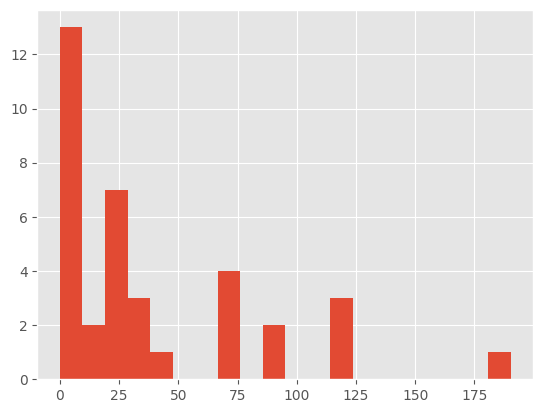

In [3]:
plt.hist(killer1, bins=20);

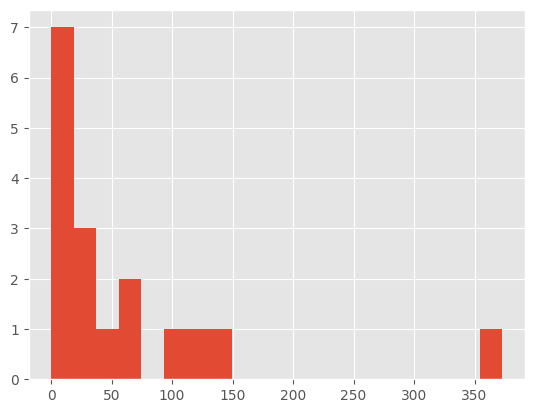

In [4]:
plt.hist(killer2, bins=20);

Мы хотим проверить гипотезу о том, что игры с точки зрения времени между убийствами прошли одинаково. Люди одинаково сильно были вовлечены в оба раунда игры и не потеряли энтузиазм.

__а) [1 балл]__ Проверьте гипотезу об однородности выборок с помощью [теста Манна-Уитни.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

In [7]:
stat, p_value = sts.mannwhitneyu(killer1, killer2, alternative='two-sided')

print(f"Статистика Манна-Уитни: {stat}")
print(f"p-value: {p_value:.2f}")

Статистика Манна-Уитни: 269.0
p-value: 0.49


__Ответ:__ Поскольку p-value значительно выше всех возможных уровне статистической значимости (0.01 или 0.05), нет оснований отклонять нулевую гипотезу о том, что распределения времени между убийствами в двух раундах игры однородны.

__б) [1 балл]__ Распределение выглядит, как экспоненциальное. Более того, по гистограммам возникает ощущение, что это одинаковое распределение. С помощью теста Колмогорова-Смирнова проверьте гипотезу о том, что обе выборки пришли из одного и того же распределения.

In [8]:
stat, p_value = sts.ks_2samp(killer1, killer2)

print(f"Статистика K-S: {stat}")
print(f"p-value: {p_value}")

Статистика K-S: 0.21895424836601307
p-value: 0.5452509816793373


__Ответ:__ Значение p-value (0.545) значительно больше уровня значимости 0.05 или 0.01. Нет оснований отвергать нулевую гипотезу о том, что обе выборки пришли из одного и того же распределения. Распределения времени между убийствами в двух раундах совпадают.

__в) [3 балла]__ Ответьте на вопросы:

- Какая гипотеза проверяется в тесте Манна-Уитни? Подходит ли этот тест для данной задачи?

__Ответ:__ Гипотеза о том, что две выборки взяты из генеральных совокупностей с одинаковым расположением (распределениями), то есть что распределения двух групп однородны и не отличаются по сдвигу или форме.

В целом данный тест подходит, поскольку мы сравниваем время между убиствами, соответственно нам достаточно проверить смещение без подтверждения гипотезы о форме распределения.

- Какая гипотеза проверятеся в KS-тесте?

__Ответ:__ Гипотеза о том, что две выборки взяты из одного и того же распределения, учитывая все особенности формы распределения, а не только сдвиг или медиану. Этот тест чувствителен не только к сдвигам, но и к различию масштаба, форм и тп., т.е. проверяет полную однородность.

- Какой тест вы бы вырали для решения задачи?

__Ответ:__ С учетом визуальной картинки распределений, у нас нет необходимости проверки полной однородности. Нам достаточно проверить гипотезу о сдвиге, для этого вполне подходит критерий Манна-Уитни. Но и применение K-S не будет ошибкой, поскольку позволит проверить полную однородность распределений.

## Задание 2 (парадокс Симпсона)

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований:

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$,
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы:

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин?
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство.

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона.

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а) [1 балл]__  Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин?  Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [19]:
p1 = 770 / 1650
p2 = 88 / 223

p1, p2

(0.4666666666666667, 0.39461883408071746)

__Ответ:__ Доля выздоровевших у принимавших лекарство выше (46.7%) чем у не принимавших (39.5%).
На первый взгляд это может свидетельствовать о положительном эффекте лекарства для мужчин.

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [20]:
men = np.array([[770,880],[88,135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [21]:
chi2, p_value, dof, expected = sts.chi2_contingency(men, correction=False)

print(f"Chi2 = {chi2:.4f}")
print(f"p-value = {p_value:.4f}")

Chi2 = 4.1079
p-value = 0.0427


In [22]:
# понадобится далее
expected

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

__Ответ:__ Отвергаем нулевую гипотезу (p-value < 0.05). Имеются статистически значимые основания полагать того, что лекарство влияет на выздоровление мужчин.

__б) [1 балл]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`.

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [23]:
tot = men.sum()
tot

np.int64(1873)

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [24]:
n1 = men[0].sum()
n2 = men[1].sum()
n1, n2

(np.int64(1650), np.int64(223))

Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [25]:
tot_rec = men[:, 0].sum()
tot_not_rec = men[:, 1].sum()

p_rec = tot_rec / tot
p_not_rec = tot_not_rec / tot
p_rec, p_not_rec

(np.float64(0.4580886278697277), np.float64(0.5419113721302723))

Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [26]:
row_sums = men.sum(axis=1)
col_sums = men.sum(axis=0)
total = men.sum()

expected_custom = np.outer(row_sums, col_sums) / tot
expected_custom

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

In [27]:
expected

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

__Ответ:__ Как видим, матрицы совпали.

Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [30]:
O = men
E = expected

chi2_stat_obs = np.sum((O - E)**2 / E)
p_value = 1 - sts.chi2.cdf(chi2_stat_obs, df = 1)
p_value

np.float64(0.04268446899604583)

__Ответ:__ Наблюдаемый уровень статистической значимости совпадает с библиотечной реализацией. Отвергаем нулевую гипотезу (p-value < 0.05). Имеются статистически значимые основания полагать того, что лекарство влияет на выздоровление мужчин.

__в) [1 балл]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а)

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [36]:
women = np.array([[165, 80],
                      [440, 310]])

p_treated = women[0, 0] / women[0].sum()
p_untreated = women[1, 0] / women[1].sum()

p_treated, p_untreated

(np.float64(0.673469387755102), np.float64(0.5866666666666667))

In [ ]:
chi2, p_value, dof, expected = sts.chi2_contingency(women, correction=False)
p_value

__Ответ:__ Мы видим, что доля выздоровевших женщин, принимавших лекарства, выше, чем у не принимавших. Проверка критерием хи-квадрат подтверждает корректность отклонения нулевой гипотезы. Есть статистически значимый эффект влияния лекарства на выздоровление женщин.

__г) [1 балл]__ Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [34]:
all = np.array([[935, 960],
                     [528, 445]])

p_treated = all[0, 0] / all[0].sum()
p_untreated = all[1, 0] / all[1].sum()

p_treated, p_untreated

(np.float64(0.49340369393139843), np.float64(0.5426515930113053))

__Ответ:__ На объединенной группе мы уже наблюдаем, что доля выздоровевших среди не принимавших лекарство наоборот выше.

In [35]:
chi2, p_value, dof, expected = sts.chi2_contingency(all, correction=False)
p_value

np.float64(0.012492547994073244)

__Ответ:__ И здесь статистически значимо подтверждается, что долях выздоровевших между принимавшими лекарство (около 49.3%) и не принимавшими (около 54.3%) не случайна и что парадоксально, лекарство не улучшает, а ухудшает вероятность выздоровления.

__д) [1 балл]__  Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

Нет, данные результаты не соотносятся с результатами подгрупп в отдельности:
- доля выздоровевших мужчин принимавших лекарство vs не принимавших лекарство: 46.7% vs 39.5%
- доля выздоровевших женщин принимавших лекарство vs не принимавших лекарство: 67.3% vs 58.7%
- доля выздоровевших среди всех пациентов принимавших лекарство vs не принимавших лекарство: 49.3% vs 54.3%



## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде.

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.